In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import files
uploaded = files.upload()


Saving nursery.data to nursery.data


In [3]:
columns = [
    "parents", "has_nurs", "form", "children",
    "housing", "finance", "social", "health", "class"
]

df = pd.read_csv("nursery.data", header=None, names=columns)

df.head()


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [6]:
# Ukuran dataset
df.shape

(12960, 9)

In [7]:
# Informasi tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [8]:
# Cek missing values
df.isnull().sum()


,0
parents,0
has_nurs,0
form,0
children,0
housing,0
finance,0
social,0
health,0
class,0


In [9]:
# Distribusi kelas target
df['class'].value_counts()


,count
class,
not_recom,4320
priority,4266
spec_prior,4044
very_recom,328
recommend,2


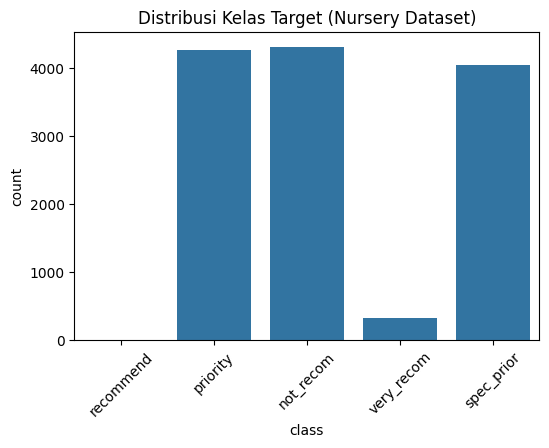

In [37]:
#Distribusi Kelas Target
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title("Distribusi Kelas Target (Nursery Dataset)")
plt.xticks(rotation=45)
plt.savefig("Distribusi Kelas Target", dpi=300, bbox_inches="tight")

plt.show()


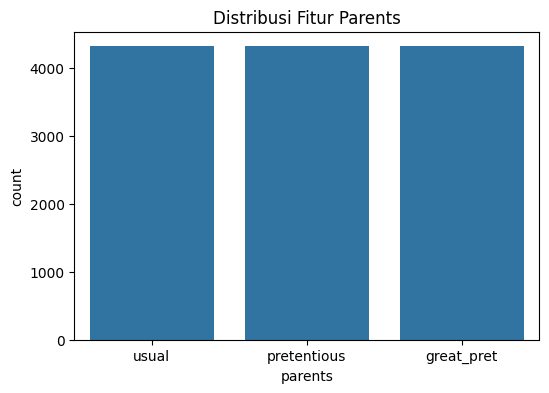

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='parents', data=df)
plt.title("Distribusi Fitur Parents")
plt.savefig("Distribusi Fitur Parents", dpi=300, bbox_inches="tight")

plt.show()


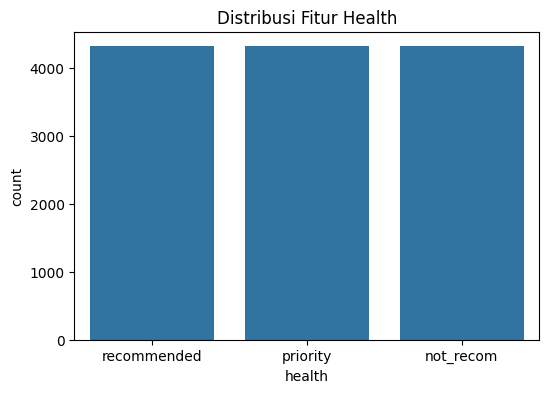

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='health', data=df)
plt.title("Distribusi Fitur Health")
plt.savefig("Distribusi Fitur Health", dpi=300, bbox_inches="tight")
plt.show()


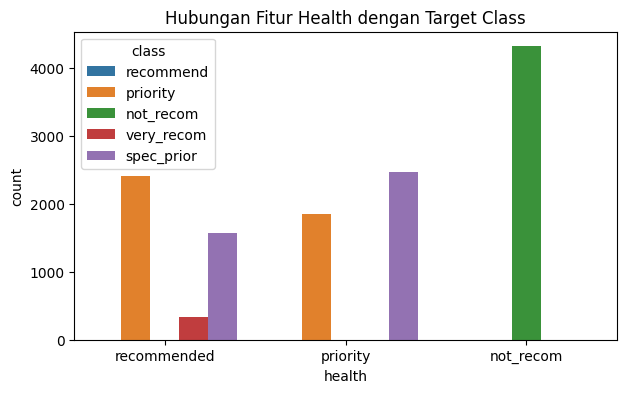

In [40]:
plt.figure(figsize=(7,4))
sns.countplot(x='health', hue='class', data=df)
plt.title("Hubungan Fitur Health dengan Target Class")
plt.savefig("Hubungan Fitur Health dengan Target Class", dpi=300, bbox_inches="tight")

plt.show()


In [16]:
# Pisahkan fitur dan target
# X berisi seluruh fitur (tanpa kolom target)
X = df.drop('class', axis=1)

# y berisi target/label klasifikasi
y = df['class']

# Cek data awal
X.head(), y.head()


(  parents has_nurs      form children     housing     finance         social  \
 0   usual   proper  complete        1  convenient  convenient        nonprob   
 1   usual   proper  complete        1  convenient  convenient        nonprob   
 2   usual   proper  complete        1  convenient  convenient        nonprob   
 3   usual   proper  complete        1  convenient  convenient  slightly_prob   
 4   usual   proper  complete        1  convenient  convenient  slightly_prob   
 
         health  
 0  recommended  
 1     priority  
 2    not_recom  
 3  recommended  
 4     priority  ,
 0    recommend
 1     priority
 2    not_recom
 3    recommend
 4     priority
 Name: class, dtype: object)

In [17]:
# Encoding target (Label Encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping kelas target:", class_mapping)

Mapping kelas target: {'not_recom': np.int64(0), 'priority': np.int64(1), 'recommend': np.int64(2), 'spec_prior': np.int64(3), 'very_recom': np.int64(4)}


In [18]:
# Encoding fitur (One-Hot Encoding)
# Seluruh fitur pada dataset Nursery bersifat kategorikal nominal,
# sehingga digunakan One-Hot Encoding untuk menghindari urutan palsu

X_encoded = pd.get_dummies(X)

# Cek hasil encoding
X_encoded.head()


,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,False,False,True,False,False,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
1,False,False,True,False,False,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
2,False,False,True,False,False,False,True,False,True,False,...,False,False,True,False,True,False,False,True,False,False
3,False,False,True,False,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,True
4,False,False,True,False,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False


In [19]:
# Train-Test Split (Stratified)
# Stratified split digunakan untuk menjaga proporsi kelas
# antara data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,        # 80% training, 20% testing
    random_state=42,      # untuk reproducibility
    stratify=y_encoded    # menjaga distribusi kelas
)

# Cek ukuran data
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (10368, 27)
Test set: (2592, 27)


In [20]:
# Scaling fitur (khusus untuk Deep Learning)
# Model deep learning (MLP) sensitif terhadap skala fitur,
# sehingga dilakukan standardisasi (mean=0, std=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit hanya pada data training untuk mencegah data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Transform data testing menggunakan parameter yang sama
X_test_scaled = scaler.transform(X_test)


Accuracy Logistic Regression (Baseline): 0.9266975308641975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       864
           1       0.88      0.90      0.89       853
           3       0.90      0.90      0.90       809
           4       0.85      0.68      0.76        66

    accuracy                           0.93      2592
   macro avg       0.91      0.87      0.89      2592
weighted avg       0.93      0.93      0.93      2592



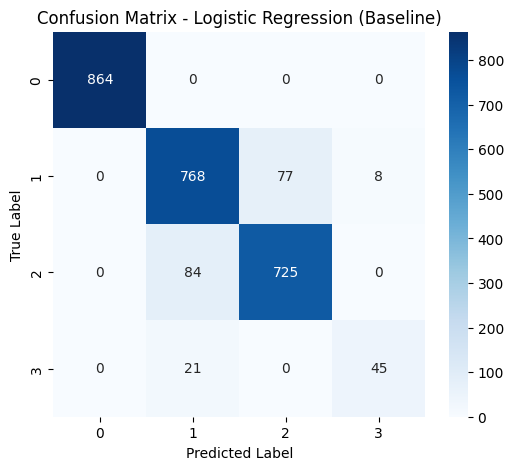

In [33]:
# BASELINE MODEL: LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model Logistic Regression
# max_iter diperbesar agar optimasi konvergen
# random_state untuk reproducibility
logreg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

# Training model menggunakan data training
logreg.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_logreg = logreg.predict(X_test)

# Evaluasi performa model
# Hitung akurasi
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy Logistic Regression (Baseline):", acc_logreg)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Baseline)")

plt.savefig("cm_logistic_regression.png", dpi=300, bbox_inches="tight")
plt.show()


Best Hyperparameters:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy Random Forest (Tuned): 0.9880401234567902

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       864
           1       0.99      0.98      0.98       853
           3       0.98      1.00      0.99       809
           4       1.00      0.85      0.92        66

    accuracy                           0.99      2592
   macro avg       0.99      0.96      0.97      2592
weighted avg       0.99      0.99      0.99      2592



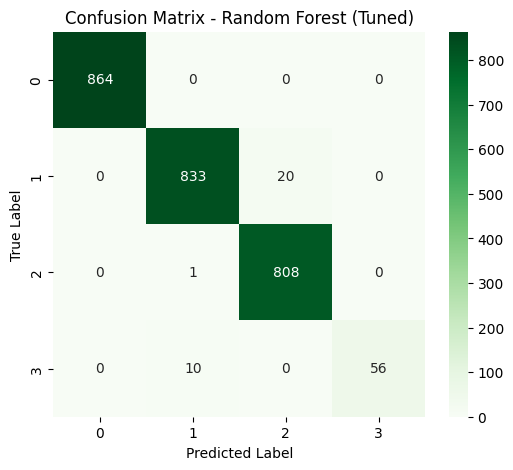

In [34]:
# ADVANCED MODEL: RANDOM FOREST + GRIDSEARCHCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Definisi grid hyperparameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Inisialisasi GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ),
    param_grid=param_grid,
    cv=3,                    # cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Training GridSearchCV
grid_rf.fit(X_train, y_train)

# Model Random Forest terbaik hasil tuning
best_rf = grid_rf.best_estimator_

print("Best Hyperparameters:")
print(grid_rf.best_params_)

# Prediksi pada data testing
y_pred_rf = best_rf.predict(X_test)

# Evaluasi performa model
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy Random Forest (Tuned):", acc_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (Tuned)")

plt.savefig("cm_random_forest_tuned.png", dpi=300, bbox_inches="tight")
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,165 (47.52 KB)

 Trainable params: 12,165 (47.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7059 - loss: 0.7832 - val_accuracy: 0.9412 - val_loss: 0.1689
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9173 - loss: 0.2131 - val_accuracy: 0.9711 - val_loss: 0.0976
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9392 - loss: 0.1526 - val_accuracy: 0.9822 - val_loss: 0.0631
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9570 - loss: 0.1160 - val_accuracy: 0.9908 - val_loss: 0.0410
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0797 - val_accuracy: 0.9937 - val_loss: 0.0261
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0619 - val_accuracy: 0.9981 - val_loss: 0.0173
Epoch 7/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9976 - val_loss: 0.0147
Epoch 8/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0450 - val_accuracy: 0

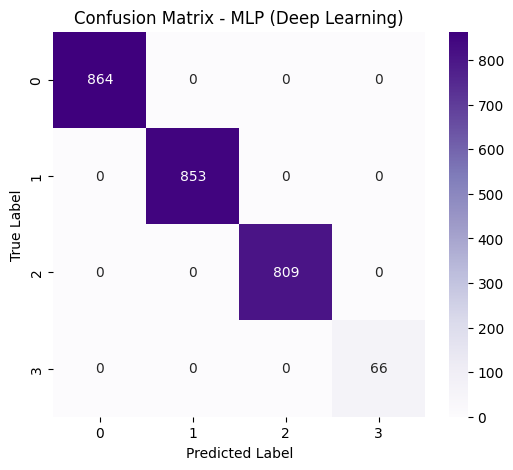

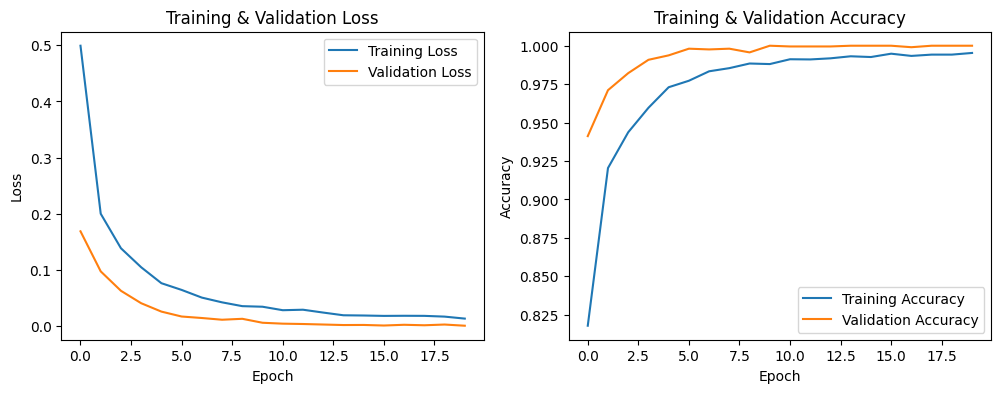

In [36]:
# DEEP LEARNING MODEL: MULTILAYER PERCEPTRON (MLP)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# One-hot encoding target untuk deep learning
num_classes = len(np.unique(y_train))

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Membangun arsitektur MLP
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile model
model_mlp.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_mlp.summary()

# Callback: Early Stopping (mencegah overfitting)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training model
start_time = time.time()

history = model_mlp.fit(
    X_train_scaled,
    y_train_cat,
    validation_split=0.2,
    epochs=20,              # >= 10 epoch
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

training_time = time.time() - start_time
print(f"\nTraining Time: {training_time:.2f} seconds")

# Evaluasi pada data test
y_pred_prob = model_mlp.predict(X_test_scaled)
y_pred_mlp = np.argmax(y_pred_prob, axis=1)

acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("\nAccuracy MLP (Deep Learning):", acc_mlp)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_mlp,
    annot=True,
    fmt='d',
    cmap='Purples'
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MLP (Deep Learning)")

plt.savefig("cm_mlp.png", dpi=300, bbox_inches="tight")
plt.show()

# Visualisasi Training History
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("mlp_training_history.png", dpi=300, bbox_inches="tight")
plt.show()


In [27]:
# MODEL COMPARISON TABLE

import pandas as pd

comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Random Forest (Tuned)",
        "MLP (Deep Learning)"
    ],
    "Accuracy": [
        acc_logreg,
        acc_rf,
        acc_mlp
    ]
})

comparison_df


,Model,Accuracy
0,Logistic Regression (Baseline),0.926698
1,Random Forest (Tuned),0.988040
2,MLP (Deep Learning),1.000000


from matplotlib import pyplot as plt
comparison_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Accuracy'}, axis=1)
              .sort_values('Accuracy', ascending=True))
  xs = counted['Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('Accuracy', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
comparison_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

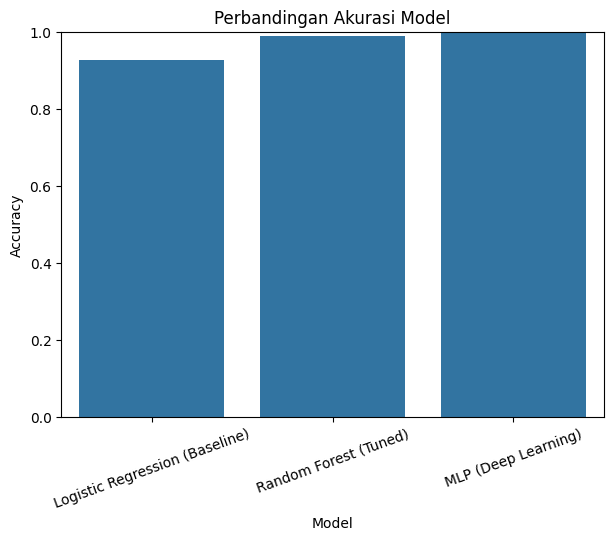

In [29]:
# VISUALISASI PERBANDINGAN AKURASI

plt.figure(figsize=(7,5))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.title("Perbandingan Akurasi Model")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()


In [30]:
import joblib

# Simpan Logistic Regression
joblib.dump(logreg, "logistic_regression_baseline.pkl")

# Simpan Random Forest (tuned)
joblib.dump(best_rf, "random_forest_tuned.pkl")

print("Model ML & preprocessing berhasil disimpan.")


Model ML & preprocessing berhasil disimpan.


In [32]:
# Simpan model MLP
model_mlp.save("mlp_nursery_model.keras")

print("Model MLP berhasil disimpan.")


Model MLP berhasil disimpan.
